<a href="https://colab.research.google.com/github/shweta-aiml/100daysofcode/blob/master/ExtractDataFromTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
consumerKey= '4kUp8Pg8eTpZAfp1iBrceeFH7'
consumerSecret= 'KvcRUlvRa9s8lbgVRmXJXdpGbxtFrt3ZxM1pUuKU1GrxUYh5Lk'
accessToken= '2328296736-xCVBeBMKuAWAYoSF9z9gIQatKYm2chsqmz5AgX8'
accessTokenSecret= 'UabLq7A5QQn8rUcRL6vVLl9sPqgsc6HlVFB3kijlDyQIG'


In [0]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")


#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) I am committed to listening and learning more about systemic racism and what I can do with my actions and words to help create a more equal and just future. Black lives matter.

2) …in policing, criminal justice, education, health care, housing, the workplace and all other areas of their lives.

3) The horrifying killings of George Floyd, Ahmaud Arbery, Breonna Taylor and far too many other Black people—and the protests they sparked—are shining a light on the brutal injustices that Black people experience every day…

4) RT @gatesfoundation: Today world leaders pledged to fully support @gavi’s mission to give more children access to lifesaving vaccines and b…

5) RT @melindagates: The video of George Floyd’s brutal death broke my heart. I’ve watched the protests that followed and have felt overwhelme…



In [34]:
# #tweet from India
# places = api.geo_search(query="India", granularity="country")

# #  Print the last 5 tweets
# place_id = places[0].id

# tweets = api.search(q="place:%s" % place_id)
# for tweet in tweets:
#     print(tweet.text + " | " + tweet.place.name) if tweet.place else "Undefined place"

#tweepy.Cursor(api.search,q="from:<screen_name> #<hashtag>")
search_words = '#Covid'
place = 'India'
date_since = '2020-05-6'
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              country='India',
              since=date_since).items(50)

# Iterate and print tweets
# for tweet in tweets:
#     print(tweet.text)

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in tweets[:5]:
    print(str(i) +') '+ tweet.text + '\n')
    i= i+1

Show the 5 recent tweets:



TypeError: ignored

In [7]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,I am committed to listening and learning more ...
1,"…in policing, criminal justice, education, hea..."
2,"The horrifying killings of George Floyd, Ahmau..."
3,RT @gatesfoundation: Today world leaders pledg...
4,RT @melindagates: The video of George Floyd’s ...


In [8]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,I am committed to listening and learning more ...
1,"…in policing, criminal justice, education, hea..."
2,"The horrifying killings of George Floyd, Ahmau..."
3,: Today world leaders pledged to fully support...
4,: The video of George Floyd’s brutal death bro...
...,...
95,This new treatment is a gamechanger for millio...
96,I was deeply moved by Tayari Jones’s story of ...
97,Here are two amazing statistics: primary healt...
98,Diane Tavenner had a simple but very ambitious...


In [9]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,I am committed to listening and learning more ...,0.361667,0.166667
1,"…in policing, criminal justice, education, hea...",0.462500,-0.262500
2,"The horrifying killings of George Floyd, Ahmau...",0.680208,-0.154167
3,: Today world leaders pledged to fully support...,0.500000,0.500000
4,: The video of George Floyd’s brutal death bro...,1.000000,-0.875000
...,...,...,...
95,This new treatment is a gamechanger for millio...,0.227273,0.218182
96,I was deeply moved by Tayari Jones’s story of ...,0.370833,-0.029167
97,Here are two amazing statistics: primary healt...,0.600000,0.283333
98,Diane Tavenner had a simple but very ambitious...,0.647781,0.382955


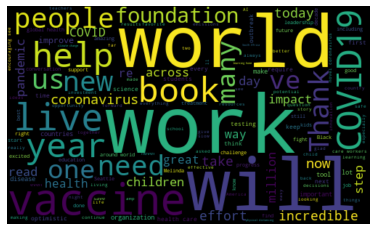

In [10]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,I am committed to listening and learning more ...,0.361667,0.166667,Positive
1,"…in policing, criminal justice, education, hea...",0.462500,-0.262500,Negative
2,"The horrifying killings of George Floyd, Ahmau...",0.680208,-0.154167,Negative
3,: Today world leaders pledged to fully support...,0.500000,0.500000,Positive
4,: The video of George Floyd’s brutal death bro...,1.000000,-0.875000,Negative
...,...,...,...,...
95,This new treatment is a gamechanger for millio...,0.227273,0.218182,Positive
96,I was deeply moved by Tayari Jones’s story of ...,0.370833,-0.029167,Negative
97,Here are two amazing statistics: primary healt...,0.600000,0.283333,Positive
98,Diane Tavenner had a simple but very ambitious...,0.647781,0.382955,Positive


In [13]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) I am committed to listening and learning more about systemic racism and what I can do with my actions and words to help create a more equal and just future. Black lives matter.

2) : Today world leaders pledged to fully support ’s mission to give more children access to lifesaving vaccines and b…

3) I continue to be inspired by all of the volunteers (including many retired health care workers and teachers) on the front lines of the fight against coronavirus each day. 

4) Here are five books to read this summer if you want to learn more about pandemics or are looking for a distraction:  

5) Melinda recommended that I read The Choice, and I’m glad she did. I think many people will find comfort right now from Dr. Edith Eva Eger's suggestions on how to handle difficult situations. 

6) Today is RedNoseDay. Their work has made an incredible impact to reduce child poverty in the US and around the world. 

7) The 1918 influenza outbreak is the closest comparis

In [14]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) …in policing, criminal justice, education, health care, housing, the workplace and all other areas of their lives.

2) The horrifying killings of George Floyd, Ahmaud Arbery, Breonna Taylor and far too many other Black people—and the protests they sparked—are shining a light on the brutal injustices that Black people experience every day…

3) : The video of George Floyd’s brutal death broke my heart. I’ve watched the protests that followed and have felt overwhelme…

4) I’m hopeful that this program will improve our understanding of the coronavirus outbreak in Seattle and provide valuable information about the virus for other communities around the world. 

5) Class of 2020, these are not easy times. But we will get through them. And with your leadership, the world will be stronger than before. 

6) Halting funding for the World Health Organization during a world health crisis is as dangerous as it sounds. Their work is slowing the spread of COVID-19 and if

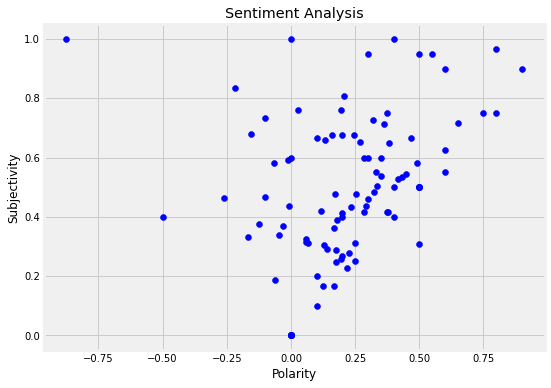

In [15]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [16]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

75.0

In [17]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

15.0

In [18]:
# Show the value counts
df['Analysis'].value_counts()

Positive    75
Negative    15
Neutral     10
Name: Analysis, dtype: int64

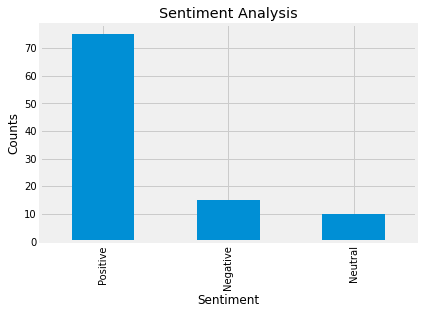

In [19]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()